In [8]:
#Human_Activity_Recognition_Using_Smartphones_Data

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [16]:
df=pd.read_csv("data\Human_Activity_Recognition_Using_Smartphones_Data.csv")

<>:1: SyntaxWarning: invalid escape sequence '\H'
<>:1: SyntaxWarning: invalid escape sequence '\H'
C:\Users\ashis\AppData\Local\Temp\ipykernel_39044\593822939.py:1: SyntaxWarning: invalid escape sequence '\H'
  df=pd.read_csv("data\Human_Activity_Recognition_Using_Smartphones_Data.csv")


In [18]:
df.head()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [20]:
df.shape

(10299, 563)

In [22]:
df.isnull().sum()


tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [24]:
df.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
10294    False
10295    False
10296    False
10297    False
10298    False
Length: 10299, dtype: bool

In [26]:
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [28]:
feature_cols = df.columns[:-1]
corr_values = df[feature_cols].corr()
corr_values


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
tBodyAcc-mean()-X,1.000000,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,...,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656,0.020345
tBodyAcc-mean()-Y,0.128037,1.000000,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,...,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233,-0.001577
tBodyAcc-mean()-Z,-0.230302,-0.029882,1.000000,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,...,0.023050,0.023122,0.055020,-0.042083,-0.066233,-0.030748,0.003215,-0.012986,-0.028406,0.001981
tBodyAcc-std()-X,0.004590,-0.046352,-0.024185,1.000000,0.922525,0.861910,0.998662,0.916087,0.856497,0.981226,...,0.165552,0.135171,-0.034334,-0.017096,0.027464,-0.027123,-0.374104,0.449425,0.393063,-0.061397
tBodyAcc-std()-Y,-0.016785,-0.046996,-0.023745,0.922525,1.000000,0.888259,0.918561,0.997510,0.887052,0.911137,...,0.220279,0.191164,-0.020806,-0.006605,0.001902,-0.015784,-0.381391,0.506106,0.425511,-0.094486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroJerkMean,gravityMean)",0.034296,0.077627,-0.030748,-0.027123,-0.015784,-0.012196,-0.027097,-0.013411,-0.012800,-0.030908,...,-0.013065,-0.011829,-0.027478,0.023605,-0.112454,1.000000,0.024822,-0.004582,-0.012549,0.008301
"angle(X,gravityMean)",-0.041021,-0.007513,0.003215,-0.374104,-0.381391,-0.353271,-0.371168,-0.378013,-0.355836,-0.384244,...,-0.085226,-0.081971,0.008050,0.017534,-0.007095,0.024822,1.000000,-0.748249,-0.635231,0.025003
"angle(Y,gravityMean)",0.034053,-0.005616,-0.012986,0.449425,0.506106,0.459092,0.444926,0.507947,0.460345,0.458832,...,0.087671,0.078010,0.003082,-0.007256,-0.006444,-0.004582,-0.748249,1.000000,0.545614,-0.024190
"angle(Z,gravityMean)",0.030656,-0.016233,-0.028406,0.393063,0.425511,0.483424,0.389481,0.424479,0.480032,0.402873,...,0.058759,0.054008,-0.003242,-0.013130,-0.015380,-0.012549,-0.635231,0.545614,1.000000,-0.067160


In [30]:
tril_index = np.tril_indices_from(corr_values)
tril_index


(array([  0,   1,   1, ..., 561, 561, 561]),
 array([  0,   0,   1, ..., 559, 560, 561]))

In [32]:
corr_array = np.array(corr_values)
corr_array


array([[ 1.        ,  0.12803651, -0.23030174, ...,  0.03405337,
         0.03065649,  0.02034532],
       [ 0.12803651,  1.        , -0.02988185, ..., -0.00561596,
        -0.01623272, -0.0015774 ],
       [-0.23030174, -0.02988185,  1.        , ..., -0.01298607,
        -0.02840566,  0.0019807 ],
       ...,
       [ 0.03405337, -0.00561596, -0.01298607, ...,  1.        ,
         0.54561424, -0.02419048],
       [ 0.03065649, -0.01623272, -0.02840566, ...,  0.54561424,
         1.        , -0.06716003],
       [ 0.02034532, -0.0015774 ,  0.0019807 , ..., -0.02419048,
        -0.06716003,  1.        ]])

In [34]:
corr_array[np.tril_indices_from(corr_values)]=np.nan
pd.DataFrame(corr_array)


,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,561
0,NaN,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,...,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656,0.020345
1,NaN,NaN,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,...,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233,-0.001577
2,NaN,NaN,NaN,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,...,0.023050,0.023122,0.055020,-0.042083,-0.066233,-0.030748,0.003215,-0.012986,-0.028406,0.001981
3,NaN,NaN,NaN,NaN,0.922525,0.861910,0.998662,0.916087,0.856497,0.981226,...,0.165552,0.135171,-0.034334,-0.017096,0.027464,-0.027123,-0.374104,0.449425,0.393063,-0.061397
4,NaN,NaN,NaN,NaN,NaN,0.888259,0.918561,0.997510,0.887052,0.911137,...,0.220279,0.191164,-0.020806,-0.006605,0.001902,-0.015784,-0.381391,0.506106,0.425511,-0.094486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.024822,-0.004582,-0.012549,0.008301
558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.748249,-0.635231,0.025003
559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.545614,-0.024190
560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.067160


In [36]:
corr_values = pd.DataFrame(corr_array,columns = corr_values.columns,index = corr_values.index)
corr_values = (corr_values
.stack()
.to_frame()
.reset_index()
.rename(columns={'level_0':'feature1',
'level_1':'feature2',
0:'correlation'}))
# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

[Text(0.5, 0, 'abs_correlation'), Text(0, 0.5, 'frequency')]

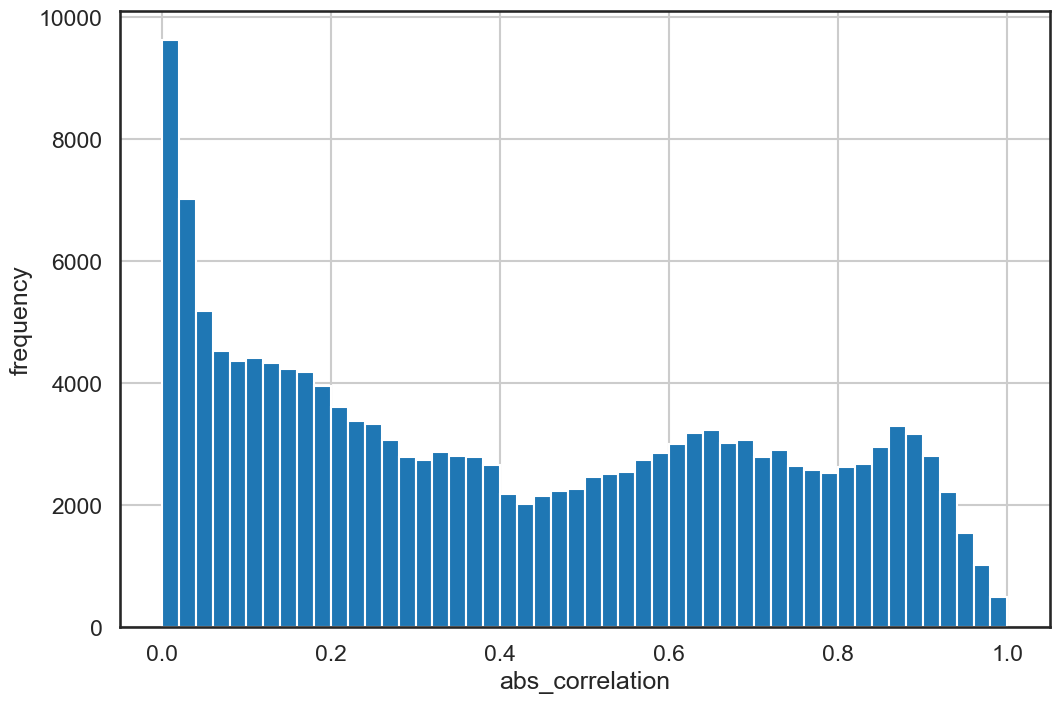

In [38]:
sns.set_context('talk')
sns.set_style('white')
ax = corr_values.abs_correlation.hist(bins = 50,figsize = (12,8))
ax.set(xlabel = 'abs_correlation',ylabel = 'frequency')

In [40]:
from sklearn.model_selection import train_test_split

In [42]:
x = df.drop('Activity',axis = 1)
y = df["Activity"]

In [44]:
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(10299, 562)
(10299,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)


In [48]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7209, 562)
(7209,)
(3090, 562)
(3090,)


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

In [52]:
y_train.value_counts(normalize=True)

Activity
STANDING              0.188514
LAYING                0.186850
SITTING               0.168401
WALKING               0.164100
WALKING_UPSTAIRS      0.155361
WALKING_DOWNSTAIRS    0.136773
Name: proportion, dtype: float64

In [54]:
y_test.value_counts(normalize=True)


Activity
LAYING                0.193204
SITTING               0.182201
STANDING              0.177023
WALKING               0.174434
WALKING_UPSTAIRS      0.137217
WALKING_DOWNSTAIRS    0.135922
Name: proportion, dtype: float64

In [56]:
lr = LogisticRegression(solver = 'liblinear').fit(x_train,y_train)

In [57]:
lr_l1 = LogisticRegressionCV(Cs = 10,cv = 4,penalty = 'l1',solver = 'liblinear').fit(x_train,y_train)


In [59]:
lr_l2 = LogisticRegressionCV(Cs = 10,cv = 4,penalty = 'l2',solver = 'liblinear').fit(x_train,y_train)


In [68]:
coefficients = list()
coeff_labels = ['lr','l1','l2']
coeff_models = [lr,lr_l1,lr_l2]
for lab,mod in zip(coeff_labels,coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels = [[lab],[0,1,2,3,4,5]],codes = [[0,0,0,0,0,0],[0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T,columns=coeff_label))
coefficients = pd.concat(coefficients,axis = 1)
coefficients.sample(10)


lr                                                          l1  \
            0         1         2         3         4         5         0   
450  0.095069 -0.289285  0.386797  1.559788 -0.134677 -1.196134  0.000000   
517 -0.055569 -0.254284 -0.192647  0.480697 -0.101540 -0.473530  0.000000   
213 -0.007527 -0.540580 -0.178273 -0.134252 -0.359367  0.004702  0.000000   
238 -0.112372  0.532464 -0.401503  0.200176 -0.698596  0.067722  0.000000   
355 -0.026945  0.018840 -0.139773  0.305772 -0.123441 -0.293762  0.000000   
222 -0.052873  0.068786  0.101910  0.389442 -0.567757 -0.344528  0.000000   
347 -0.065959 -0.260717 -0.262991  0.425562 -0.218111 -0.060318  0.000000   
432 -0.029597 -0.080019 -0.123902 -0.155908  0.543893 -0.266745 -0.008758   
301  0.095640 -0.356092  0.646948  0.074555  0.163284 -0.076541  0.000000   
368 -0.016525  0.490955 -0.268159  0.828905  0.710518 -0.306499  0.000000   

                                                             l2            \
            1         2         3         4         5         0         1   
450 -0.416971  0.852548  2.115529  0.000000 -1.240002  0.085106 -0.458780   
517  0.000000  0.000000  1.568966  0.000000 -1.742909 -0.062020 -0.351960   
213 -1.294397  0.000000  0.000000  0.000000  0.000000 -0.007953 -0.794325   
238  0.611837 -0.195777  0.045153 -0.840538  0.000000 -0.136569  0.675527   
355  0.000000  0.000000  0.115200  0.000000  0.000000 -0.032176  0.057197   
222  0.250387  0.000000  0.184295 -2.184833 -0.230462 -0.076945  0.110576   
347  0.000000  0.000000  0.482698  0.000000  0.000000 -0.075898 -0.365686   
432  0.072595  0.000000 -0.316281  1.581891  0.000000 -0.039983 -0.000684   
301 -0.493610  1.047167  0.000000  0.000000  0.000000  0.120064 -0.494301   
368  0.026465  0.000000  2.905956  3.608076  0.000000 -0.014473  1.050071   

                                             
            2         3         4         5  
450  0.706810  4.182446 -0.929251 -2.985566  
517  0.377753  1.788188 -0.753168 -2.077991  
213 -0.274670 -0.327174 -1.436739  0.257624  
238 -1.155270  0.579863 -2.365368 -0.250237  
355 -0.267096  0.821831 -0.743141 -1.183970  
222  0.653606  0.829582 -1.661402 -1.153120  
347 -1.337269  1.269179 -0.794858 -0.116271  
432  1.284762 -0.568865  1.800497 -1.996962  
301  5.918341  0.519492  1.017086 -0.987325  
368 -3.221953  2.607866  2.896489 -1.565366

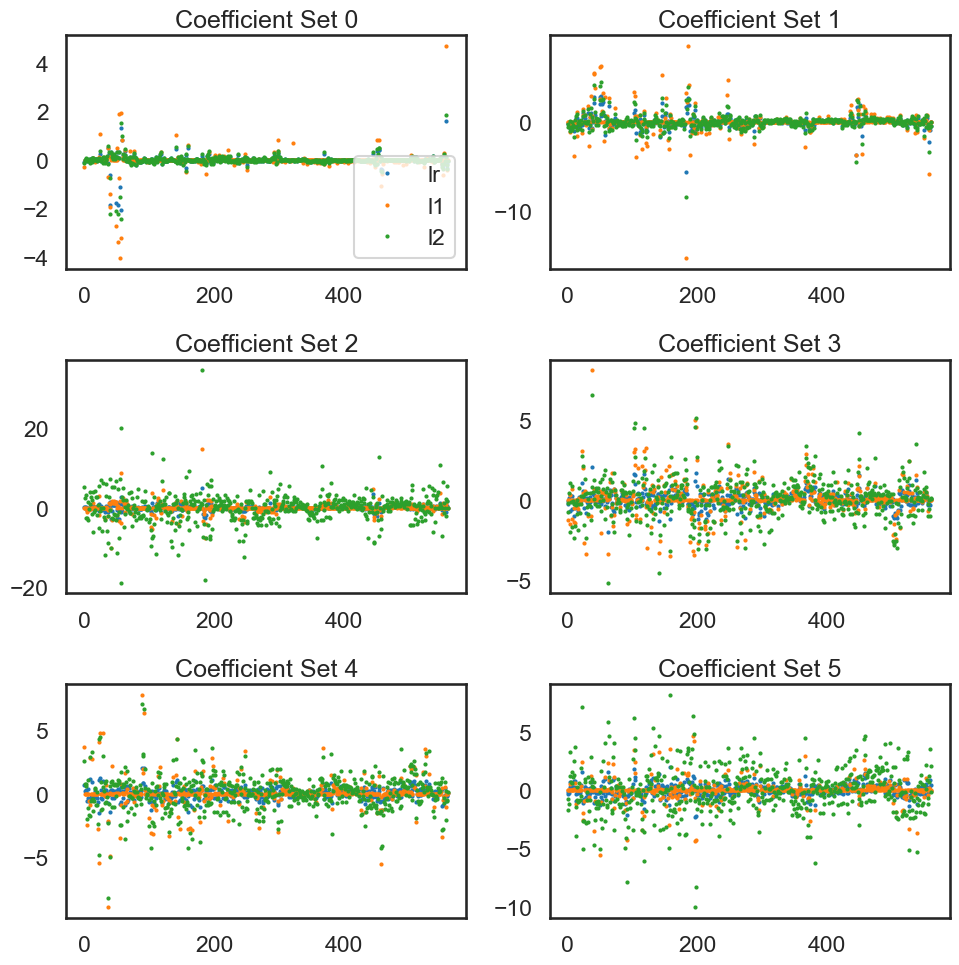

In [72]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)
for ax in enumerate(axList):
 loc = ax[0]
 ax = ax[1]
 data = coefficients.xs(loc, level=1, axis=1)
 data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
 if ax is axList[0]:
  ax.legend(loc=4)
 ax.set(title='Coefficient Set '+str(loc))
plt.tight_layout()


In [74]:
y_pred = list()
y_prob = list()
coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]
for lab,mod in zip(coeff_labels, coeff_models):
 y_pred.append(pd.Series(mod.predict(x_test), name=lab))
 y_prob.append(pd.Series(mod.predict_proba(x_test).max(axis=1), name=lab))
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)
y_pred.head()


,lr,l1,l2
0,WALKING,WALKING,WALKING
1,LAYING,LAYING,LAYING
2,STANDING,STANDING,STANDING
3,STANDING,STANDING,STANDING
4,WALKING,WALKING,WALKING


In [76]:
y_prob.head()


,lr,l1,l2
0,0.992999,0.999700,0.999993
1,0.999976,1.000000,0.999999
2,0.603722,0.632372,0.584445
3,0.942698,0.977900,0.965668
4,0.974388,0.980718,0.999925


In [80]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
metrics = list()
cm = dict()
for lab in coeff_labels:
 # Preciision, recall, f-score from the multi-class support function
 precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
 # The usual way to calculate accuracy
 accuracy = accuracy_score(y_test, y_pred[lab])
 # ROC-AUC scores can be calculated by binarizing the data
 auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
  label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]),
  average='weighted')
# Last, the confusion matrix
 cm[lab] = confusion_matrix(y_test, y_pred[lab])
 metrics.append(pd.Series({'precision':precision, 'recall':recall,  'fscore':fscore, 'accuracy':accuracy,  'auc':auc},name=lab))
metrics = pd.concat(metrics, axis=1)


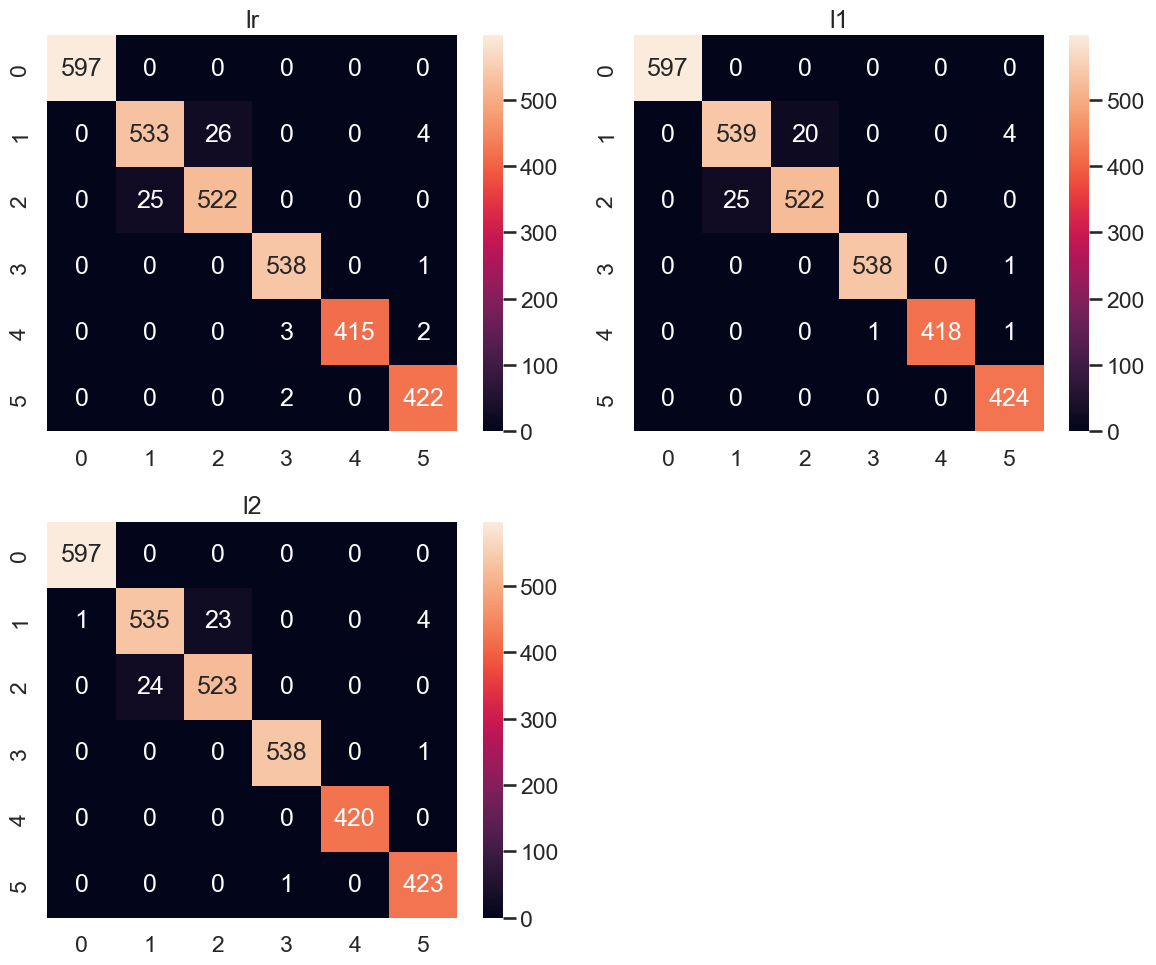

In [84]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)
axList[-1].axis('off')
for ax,lab in zip(axList[:-1], coeff_labels):
 sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
 ax.set(title=lab);
plt.tight_layout()


In [28]:
#Human_Activity_Recognition_Using_Smartphones_Data feature selection

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [32]:
df1=pd.read_csv("data\Human_Activity_Recognition_Using_Smartphones_Data.csv")

In [40]:
df=df1[0:7352]

In [42]:
df.shape

(7352, 563)

In [44]:
df['Activity'].value_counts()


Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

In [46]:
#Duplicated Feature

In [48]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Separate features and target
X = df.drop('Activity', axis=1)
y = df['Activity']
# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
# Print the shape of X_train
print(X_train.shape)
# Print the shape of X_test
print(X_test.shape)


(5881, 562)
(1471, 562)


In [52]:
#Applying Logistic Regression

In [54]:
# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=1000) # Increase max_iter if it doesn't converge
log_reg.fit(X_train, y_train)
# Make predictions on the test set
y_pred = log_reg.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)


Test accuracy: 0.981645139360979


In [56]:
#1. Removing Duplicate Columns


In [74]:
def get_duplicate_columns(df):
 """
 Returns a dictionary of duplicate columns in a DataFrame.
 
 Args:
 df (pandas.DataFrame): The input DataFrame.
 
 Returns:
 dict: A dictionary where the keys are duplicate columns and the values are lists of duplicate columns.
 """
 duplicate_columns = {}
 seen_columns = {}
 for column in df.columns:
     current_column = df[column]
 # Convert column data to bytes
 try:
     current_column_hash = current_column.values.tobytes()
 except AttributeError:
     current_column_hash = current_column.to_string().encode()
 if current_column_hash in seen_columns:
     if seen_columns[current_column_hash] in duplicate_columns:
         duplicate_columns[seen_columns[current_column_hash]].append(column)
     else:
        duplicate_columns[seen_columns[current_column_hash]] = [column]
 else:
    seen_columns[current_column_hash] = column
 return duplicate_columns


In [76]:
# Get duplicate columns in the dataset
duplicate_columns = get_duplicate_columns(X_train)

In [78]:
duplicate_columns
# Duplicated in key pair values


{}

In [80]:
X_train[['tBodyAccMag-mean()','tBodyAccMag-sma()','tGravityAccMag-mean()','tGravityAccMag-sma()']]


,tBodyAccMag-mean(),tBodyAccMag-sma(),tGravityAccMag-mean(),tGravityAccMag-sma()
57,-0.997420,-0.997420,-0.997420,-0.997420
4154,-0.133797,-0.133797,-0.133797,-0.133797
6945,0.130528,0.130528,0.130528,0.130528
527,-0.955222,-0.955222,-0.955222,-0.955222
4196,-0.992499,-0.992499,-0.992499,-0.992499
...,...,...,...,...
5191,-0.372758,-0.372758,-0.372758,-0.372758
5226,-0.256033,-0.256033,-0.256033,-0.256033
5390,-0.434138,-0.434138,-0.434138,-0.434138
860,-0.983969,-0.983969,-0.983969,-0.983969


In [82]:
# Remove duplicate columns from X_train and X_test
for one_list in duplicate_columns.values():
 X_train.drop(columns=one_list,inplace=True)
 X_test.drop(columns=one_list,inplace=True)


In [84]:
print(X_train.shape)


(5881, 562)


In [86]:
print(X_test.shape)


(1471, 562)


In [88]:
#2. Variance Threshold

In [90]:
# Code
from sklearn.feature_selection import VarianceThreshold
# Create a VarianceThreshold object with a threshold of 0.05
sel = VarianceThreshold(threshold=0.05)

In [92]:
sel.fit(X_train)

VarianceThreshold(threshold=0.05)

In [94]:
# Get the support of the current selection
# sel.get_support()
""" get_support = It will return an array of boolean values. True for the features whose importance is greater than 
the mean importance and False for the rest."""

' get_support = It will return an array of boolean values. True for the features whose importance is greater than \nthe mean importance and False for the rest.'

In [96]:
# Calculates the sum of the selected support.
sum(sel.get_support()) # 349 are greater than Threshold


370

In [98]:
# Retrieve the selected columns from X_train
columns = X_train.columns[sel.get_support()]

In [100]:
columns
# columns are greater than Threshold

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject'],
      dtype='object', length=370)

In [102]:
# Transform the features of the training set using sel ( Keep OnLy 349 columns and delete every column , where below threshold
X_train = sel.transform(X_train)
# Transform the features of the testing set using sel
X_test = sel.transform(X_test)
# Create DataFrames for the transformed training and test sets with the specified column names
#because they conveted in to numpy arrays
X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [104]:
print(X_train.shape)
print(X_test.shape)
# Here We got 349 Columns , Firstly data consists of 540 columns

(5881, 370)
(1471, 370)


In [106]:
# Print the first few rows of the X_train dataframe
X_train.head()


,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,-0.994425,-0.994873,-0.994886,-0.994939,-0.993994,-0.995450,-0.938974,-0.577031,-0.813863,0.846922,...,-0.684497,-0.901888,0.751089,0.626432,0.263401,-0.646225,0.398881,-0.546717,-0.431200,1.0
1,-0.326331,0.069663,-0.224321,-0.343326,0.039623,-0.256327,-0.310961,0.085617,-0.411806,0.271334,...,-0.131946,-0.591721,0.628099,-0.357089,-0.925512,0.110212,-0.474013,0.383162,0.238969,21.0
2,-0.026220,-0.032163,0.393109,-0.118256,-0.030279,0.432861,0.370607,-0.072309,0.200747,0.118277,...,-0.643660,-0.935668,-0.182993,0.484857,-0.961034,0.147325,-0.819001,0.221549,-0.003571,29.0
3,-0.981092,-0.901124,-0.960423,-0.984417,-0.901405,-0.965788,-0.922291,-0.524676,-0.807362,0.825370,...,-0.326860,-0.645937,0.205896,-0.168239,-0.197557,0.328892,-0.744428,0.274256,0.031246,3.0
4,-0.997380,-0.983893,-0.984482,-0.997331,-0.985196,-0.983768,-0.942062,-0.564033,-0.810993,0.853330,...,-0.113724,-0.445144,-0.267371,-0.304399,-0.081555,0.110146,-0.615329,0.322236,0.161577,21.0


In [108]:
#3. Correlation

In [110]:
# code
import seaborn as sns


<Axes: >

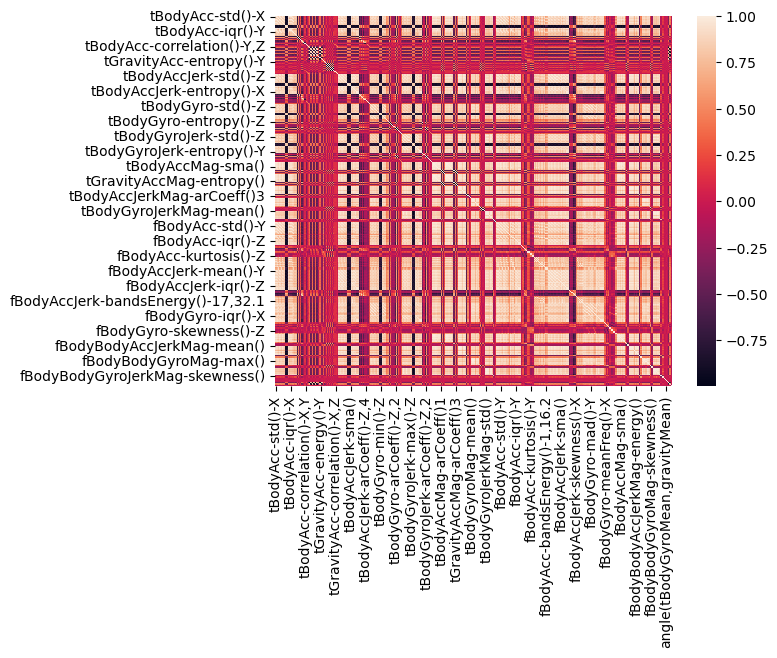

In [112]:
# Create a heatmap of the correlation matrix of X_train
sns.heatmap(X_train.corr())


In [114]:
X_train.corr()

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
tBodyAcc-std()-X,1.000000,0.927247,0.850268,0.998631,0.920936,0.845200,0.981284,0.893743,0.843918,-0.966714,...,0.152159,0.118286,-0.042353,-0.027089,0.023914,-0.035176,-0.374114,0.472605,0.393209,-0.067715
tBodyAcc-std()-Y,0.927247,1.000000,0.895065,0.922627,0.997384,0.894128,0.917831,0.953852,0.882782,-0.937472,...,0.210313,0.179834,-0.023759,-0.012484,-0.002241,-0.028881,-0.383095,0.524945,0.432180,-0.119283
tBodyAcc-std()-Z,0.850268,0.895065,1.000000,0.842986,0.890973,0.997414,0.852711,0.864716,0.936311,-0.861033,...,0.157032,0.124579,-0.009647,-0.020843,-0.010535,-0.016002,-0.344114,0.475241,0.480824,-0.049923
tBodyAcc-mad()-X,0.998631,0.922627,0.842986,1.000000,0.916201,0.838010,0.973704,0.888702,0.838024,-0.962447,...,0.153494,0.120750,-0.049949,-0.026887,0.024098,-0.035629,-0.370629,0.467965,0.389139,-0.066568
tBodyAcc-mad()-Y,0.920936,0.997384,0.890973,0.916201,1.000000,0.890707,0.911283,0.950131,0.877793,-0.932521,...,0.205346,0.175966,-0.027747,-0.011823,-0.005865,-0.026679,-0.379578,0.526803,0.430548,-0.118213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroJerkMean,gravityMean)",-0.035176,-0.028881,-0.016002,-0.035629,-0.026679,-0.016949,-0.038935,-0.013144,-0.011510,0.030630,...,-0.030566,-0.028829,-0.025656,0.030850,-0.104987,1.000000,0.027310,-0.009582,-0.009311,0.001765
"angle(X,gravityMean)",-0.374114,-0.383095,-0.344114,-0.370629,-0.379578,-0.346350,-0.386159,-0.373556,-0.345776,0.365571,...,-0.086273,-0.081381,0.012546,0.022038,-0.009878,0.027310,1.000000,-0.784098,-0.642642,0.031829
"angle(Y,gravityMean)",0.472605,0.524945,0.475241,0.467965,0.526803,0.476498,0.482312,0.489971,0.462052,-0.471464,...,0.086150,0.078420,-0.003872,-0.005159,-0.006218,-0.009582,-0.784098,1.000000,0.596205,-0.012919
"angle(Z,gravityMean)",0.393209,0.432180,0.480824,0.389139,0.430548,0.477627,0.404088,0.424181,0.416249,-0.392253,...,0.054520,0.049765,-0.004092,-0.014265,-0.011178,-0.009311,-0.642642,0.596205,1.000000,-0.099749


In [116]:
corr_matrix = X_train.corr()

In [122]:
# Get the column names of the DataFrame
columns = corr_matrix.columns
# Create an empty list to keep track of columns to drop
columns_to_drop = []
# Loop over the columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Access the cell of the DataFrame
        if corr_matrix.loc[columns[i], columns[j]] > 0.95: # if corelation is greater than 0.95 drop them, and add remaining
            columns_to_drop.append(columns[j])
print(len(columns_to_drop)) 


2023


In [124]:
set(columns_to_drop)
"""The line set(columns_to_drop) creates a set from the columns_to_drop list.
A set is an unordered collection of unique elements. 
In this case, it creates a set of column names that need to be dropped based on the correlation condition.
"""

'The line set(columns_to_drop) creates a set from the columns_to_drop list.\nA set is an unordered collection of unique elements. \nIn this case, it creates a set of column names that need to be dropped based on the correlation condition.\n'

In [126]:
columns_to_drop = set(columns_to_drop)

In [128]:
# The code simply calculates the length of the list 'columns_to_drop'.
len(columns_to_drop)
# By using Correlation , we have dropped from 349 columns to 197 columns , we got total 152 columns remaining

217

In [130]:
# Remove specified columns from X_train and X_test
X_train.drop(columns = columns_to_drop, axis = 1, inplace=True)
X_test.drop(columns = columns_to_drop, axis = 1, inplace=True)


In [132]:
# Print the shape of the training and testing data
print(X_train.shape)
print(X_test.shape)

(5881, 153)
(1471, 153)


In [134]:
X_train

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,-0.994425,-0.994873,-0.994886,-0.813863,0.846922,0.691468,0.846423,-0.611174,-0.768785,-0.663066,...,0.394506,-0.684497,0.751089,0.626432,0.263401,-0.646225,0.398881,-0.546717,-0.431200,1.0
1,-0.326331,0.069663,-0.224321,-0.411806,0.271334,0.039452,0.269204,0.403663,0.180054,0.176069,...,0.052089,-0.131946,0.628099,-0.357089,-0.925512,0.110212,-0.474013,0.383162,0.238969,21.0
2,-0.026220,-0.032163,0.393109,0.200747,0.118277,0.072295,0.245986,0.318557,0.135103,0.087680,...,-0.038923,-0.643660,-0.182993,0.484857,-0.961034,0.147325,-0.819001,0.221549,-0.003571,29.0
3,-0.981092,-0.901124,-0.960423,-0.807362,0.825370,0.642789,0.815368,-0.376515,-0.171730,-0.496816,...,-0.145084,-0.326860,0.205896,-0.168239,-0.197557,0.328892,-0.744428,0.274256,0.031246,3.0
4,-0.997380,-0.983893,-0.984482,-0.810993,0.853330,0.687431,0.844895,-0.652548,-0.678458,-0.486837,...,0.096524,-0.113724,-0.267371,-0.304399,-0.081555,0.110146,-0.615329,0.322236,0.161577,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,-0.555352,-0.104055,-0.438064,-0.373579,0.454289,0.153427,0.475699,0.455070,0.288106,0.191017,...,0.022624,0.417731,-0.155279,-0.137981,0.929236,-0.583898,-0.703989,0.159112,-0.185944,25.0
5877,-0.290043,-0.212102,-0.469731,-0.123285,0.123907,0.202561,0.577615,0.345742,0.159941,0.085557,...,-0.039773,-0.021970,-0.019533,-0.896005,-0.039591,0.494178,-0.670139,0.106156,-0.220746,25.0
5878,-0.627198,-0.216566,-0.424764,-0.441355,0.530629,0.077330,0.469639,0.436434,0.322259,0.086872,...,0.094031,0.527152,-0.414621,-0.488542,0.095895,-0.297162,-0.856512,0.183547,-0.034939,25.0
5879,-0.994825,-0.985314,-0.965857,-0.805684,0.849776,0.688222,0.828575,-0.542681,-0.667647,-0.431412,...,0.539885,-0.889671,-0.079515,0.014291,-0.290347,0.602344,-0.839693,0.081388,-0.098270,5.0


In [136]:
#4. ANOVA

In [138]:
# code
from sklearn.feature_selection import f_classif # Anova
from sklearn.feature_selection import SelectKBest # Select ' K' Best Features
# Perform feature selection
sel = SelectKBest(f_classif, k=100).fit(X_train, y_train)
# display selected feature names
X_train.columns[sel.get_support()]
# These are 100 best columns


Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y',
       'tBodyAcc-min()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-Y,Z',
       'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z',
       'tGravityAcc-sma()', 'tGravityAcc-energy()-Y', 'tGravityAcc-energy()-Z',
       'tGravityAcc-entropy()-X', 'tGravityAcc-entropy()-Y',
       'tGravityAcc-arCoeff()-Y,1', 'tGravityAcc-arCoeff()-Y,2',
       'tGravityAcc-arCoeff()-Z,1', 'tGravityAcc-arCoeff()-Z,2',
       'tGravityAcc-correlation()-Y,Z', 'tBodyAccJerk-std()-Z',
       'tBodyAccJerk-min()-X', 'tBodyAccJerk-min()-Y', 'tBodyAccJerk-min()-Z',
       'tBodyAccJerk-entropy()-X', 'tBodyAccJerk-arCoeff

In [140]:
# stored in columns
columns = X_train.columns[sel.get_support()]

In [142]:
# Transform X_train and X_test using sel
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)
# Convert the transformed arrays into DataFrames with column names
X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [144]:
print(X_train.shape)
print(X_test.shape)
# from 152 column , we have got 100 Columns using Anova Method

(5881, 100)
(1471, 100)


In [146]:
X_train.head()

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,...,fBodyGyro-meanFreq()-Z,"fBodyGyro-bandsEnergy()-1,8.1",fBodyAccMag-maxInds,fBodyBodyAccJerkMag-min(),fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyGyroMag-meanFreq(),"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.994425,-0.994873,-0.994886,-0.813863,0.846922,0.691468,0.846423,-0.611174,-0.768785,-0.663066,...,-0.158283,-0.999962,0.172414,-0.986305,0.132640,-0.690000,-0.024257,0.398881,-0.546717,-0.431200
1,-0.326331,0.069663,-0.224321,-0.411806,0.271334,0.039452,0.269204,0.403663,0.180054,0.176069,...,-0.315738,-0.898022,-0.517241,-0.718822,0.144767,-0.316666,0.191186,-0.474013,0.383162,0.238969
2,-0.026220,-0.032163,0.393109,0.200747,0.118277,0.072295,0.245986,0.318557,0.135103,0.087680,...,-0.071045,0.192158,-0.793103,-0.290424,-0.088077,-0.270995,-0.431985,-0.819001,0.221549,-0.003571
3,-0.981092,-0.901124,-0.960423,-0.807362,0.825370,0.642789,0.815368,-0.376515,-0.171730,-0.496816,...,-0.629423,-0.996263,-0.931034,-0.997886,-0.027783,-0.651181,-0.567748,-0.744428,0.274256,0.031246
4,-0.997380,-0.983893,-0.984482,-0.810993,0.853330,0.687431,0.844895,-0.652548,-0.678458,-0.486837,...,0.261846,-0.999927,-1.000000,-0.988139,0.668020,-0.598248,-0.257360,-0.615329,0.322236,0.161577


In [148]:
#Moment of Truth

In [150]:
# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=1000) # Increase max_iter if it doesn't converge
log_reg.fit(X_train, y_train)
# Make predictions on the test set
y_pred = log_reg.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.9687287559483345
